# Quantifying Shakespeare
Analyzing the frequencies of different letters in Shakespeare's work.

(Data from: bit.ly/shakespeare-txt)

In this Notebook, we will:
1. Read all of Shakespeare's works into a list of strings
2. Count the frequencies of letters used
3. Visualize the frequencies with a bar graph

## Read the lines of the data

In [1]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read a .txt file into a list of strings for each line."""
    lines: list[str] = []
    file_handle = open(filename, "r")
    for line in file_handle:
        # strip leading and trailing whitespace " a dog " -> "a dog"
        line = line.strip()
        # make everything lowercase
        line = line.lower()
        lines.append(line)
    return lines

shakes_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakes_lines))

124456


## Counting Letters

In [2]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts by increasing the value stored at key by 1."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1

In [3]:
def count_letters(lines: list[str]) -> dict[str, int]:
    """Count the frequency of each letter in each line of lines"""
    counts: dict[str, int] = {}
    for i in lines:
        idx = 0
        shakes_string = i
        while idx < len(shakes_string):
            if shakes_string.isalpha() is True:
                key = shakes_string[idx]
                tally(counts, key)
            idx += 1
    return counts

shakes_letters: dict[str, int] = count_letters(shakes_lines)
print(shakes_letters)


{'s': 117, 'h': 50, 'a': 91, 'k': 7, 'e': 276, 'p': 44, 'r': 95, 'n': 138, 'd': 36, 'x': 99, 'i': 134, 't': 173, 'u': 113, 'l': 60, 'o': 93, 'g': 35, 'c': 37, 'm': 33, 'b': 25, 'w': 12, 'y': 10, 'v': 12, 'f': 3, 'j': 3, 'z': 1, 'q': 1}


## Sorting in Lists and Dictionaries

In [4]:
# Get list of items of a dictionary
#print(shakes_letters)
shakes_letters_list = list(shakes_letters.items())
#print(shakes_letters_list)
shakes_letters_list = sorted(shakes_letters_list)
#print(shakes_letters_list)
shakes_letters_sorted = dict(shakes_letters_list)
shakes_letters_sorted

{'a': 91,
 'b': 25,
 'c': 37,
 'd': 36,
 'e': 276,
 'f': 3,
 'g': 35,
 'h': 50,
 'i': 134,
 'j': 3,
 'k': 7,
 'l': 60,
 'm': 33,
 'n': 138,
 'o': 93,
 'p': 44,
 'q': 1,
 'r': 95,
 's': 117,
 't': 173,
 'u': 113,
 'v': 12,
 'w': 12,
 'x': 99,
 'y': 10,
 'z': 1}

## Visualize Data in Bar Graph

<BarContainer object of 26 artists>

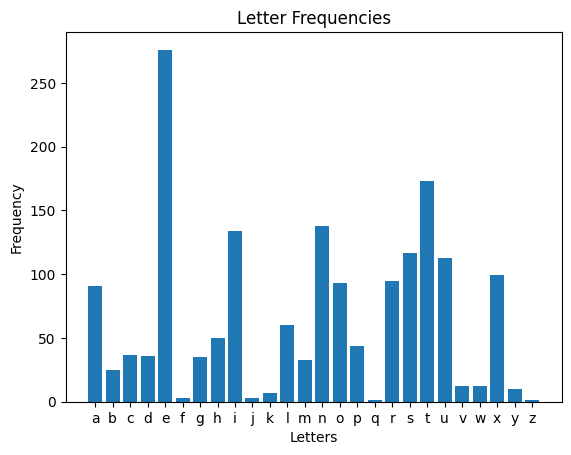

In [5]:
from matplotlib import pyplot

pyplot.title("Letter Frequencies")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequency")
x_label: list[str] = shakes_letters_sorted.keys() # my letters
y_values: list[int] = shakes_letters_sorted.values() # my letter counts
pyplot.bar(x_label, y_values)